#### Import Modules

In [143]:
import pandas as pd # is used for data analysis
import matplotlib.pyplot as plt
import seaborn as sns

#### Load dataset

In [144]:
df = pd.read_csv('./dataset/iris/iris.csv') # Load the csv file as df
df.head() # Display the first 5 lines

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### Drop column 'id'

In [145]:
df.drop(columns='Id', inplace=True) # drop the 'Id' column 
df.head() # Display the first 5 lines after drop the 'Id' column

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


###### stores the number of rows and columns (dimention)

In [146]:
df.shape 

(150, 5)

###### display the list of column

In [147]:
df.columns 

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

###### see what all the data types are in a dataframe(column)

In [148]:
df.dtypes 

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

###### To get bassic dataset information

In [149]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


##### identify missing values

In [150]:
df.isna().values.any() 

False

###### Identify duplicates entries/rows

In [151]:
#df[df.duplicated(keep=False)] # Display all rows with duplicates
df[df.duplicated()] # Display only secondary duplication line

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [152]:
df.duplicated().value_counts()

False    147
True       3
dtype: int64

##### Drop duplicate entries/row

In [153]:
df.drop_duplicates(inplace=True)
df.shape

(147, 5)

###### Displaying descriptive statistical data

In [154]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


###### Display the correlation matrix

In [155]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109321,0.871305,0.817058
SepalWidthCm,-0.109321,1.000000,-0.421057,-0.356376
PetalLengthCm,0.871305,-0.421057,1.000000,0.961883
PetalWidthCm,0.817058,-0.356376,0.961883,1.000000


## Data Visualisation

In [156]:
#%matplotlib inline # output from data visualisation will be directed to notebook

#### Heatmap

<AxesSubplot:>

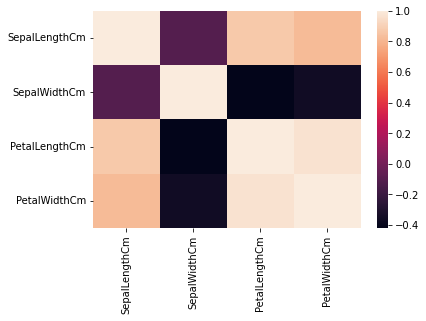

In [157]:
sns.heatmap(data=df.corr())

### Bar plot

In [158]:
df['Species'].value_counts() # Count every species in the dataframe

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

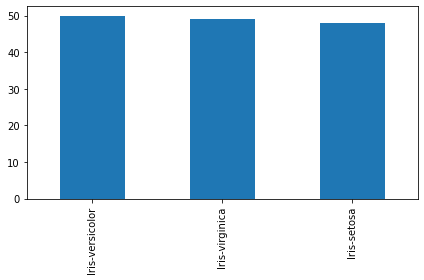

In [159]:
df['Species'].value_counts().plot.bar() #Data Visualisation with MATPLOTLIB
plt.tight_layout()
plt.show()

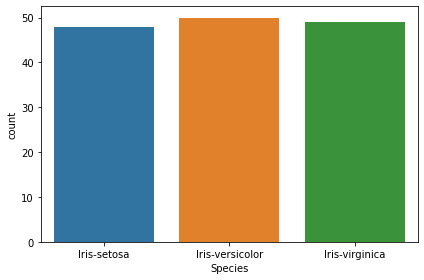

In [160]:
sns.countplot(data=df, x='Species') # Visualisation with SEABORN
plt.tight_layout()

### Pie Chart

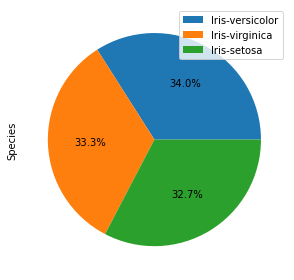

In [161]:
df['Species'].value_counts().plot.pie(autopct='%1.1f%%', labels=None, legend=True)
plt.tight_layout()

### Line Plot

Text(0.5, 1.0, 'Petal Width')

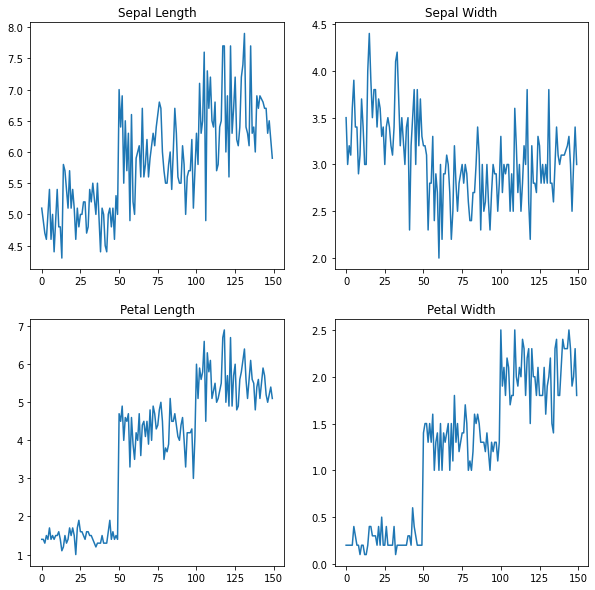

In [162]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

df['SepalLengthCm'].plot.line(ax=ax[0][0])
ax[0][0].set_title('Sepal Length')

df['SepalWidthCm'].plot.line(ax=ax[0][1])
ax[0][1].set_title('Sepal Width')

df['PetalLengthCm'].plot.line(ax=ax[1][0])
ax[1][0].set_title('Petal Length')

df['PetalWidthCm'].plot.line(ax=ax[1][1])
ax[1][1].set_title('Petal Width') # each graphic for each line

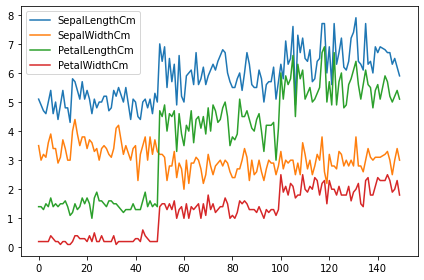

In [163]:
df.plot()
plt.tight_layout() # 4 information(lines) in 1 graphics

### Histogram

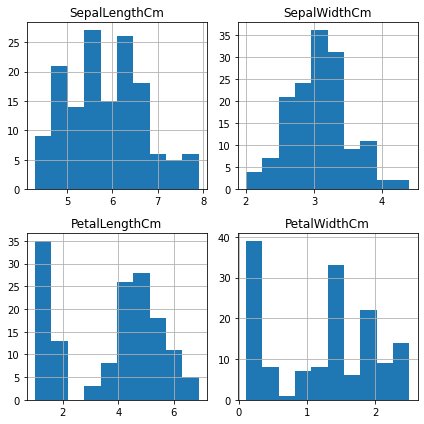

In [164]:
df.hist(figsize=(6,6), bins=10)
plt.tight_layout()

### Box Plot

**Green line** representating **Q2(Median values)** and 
**The Box** representating **Q1(low part) and Q3(upper part)**

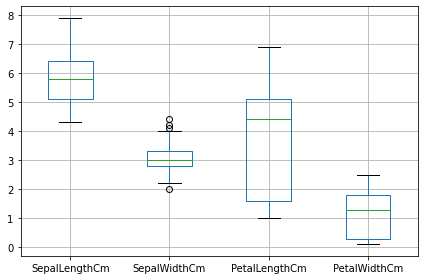

In [165]:
df.boxplot()
plt.tight_layout() # Group by COlUMN

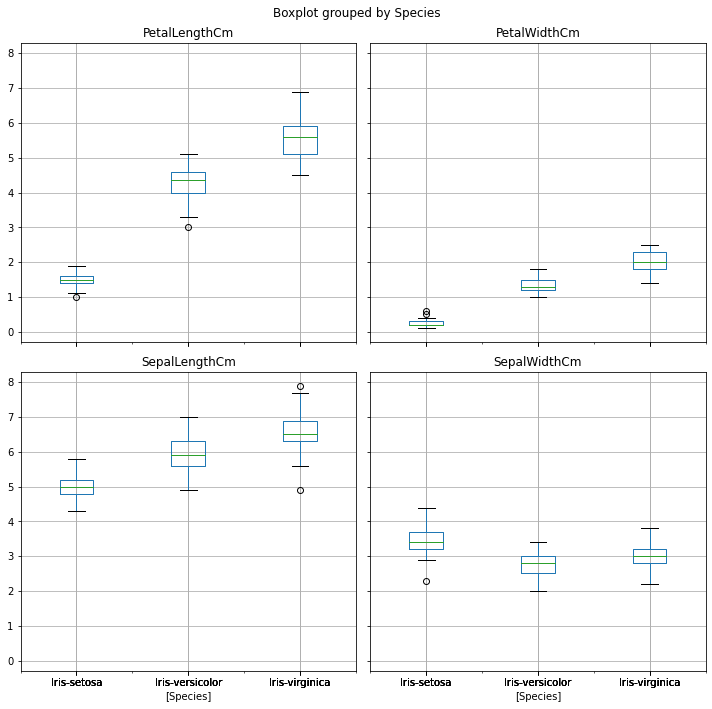

In [166]:
df.boxplot(by='Species', figsize=(10,10)) # Group by SPECIES
plt.tight_layout()

### Scatter Plot

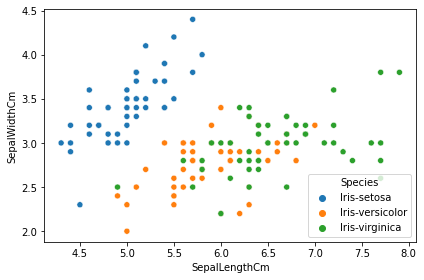

In [167]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=df, hue='Species')
plt.tight_layout()

### Pair Plot

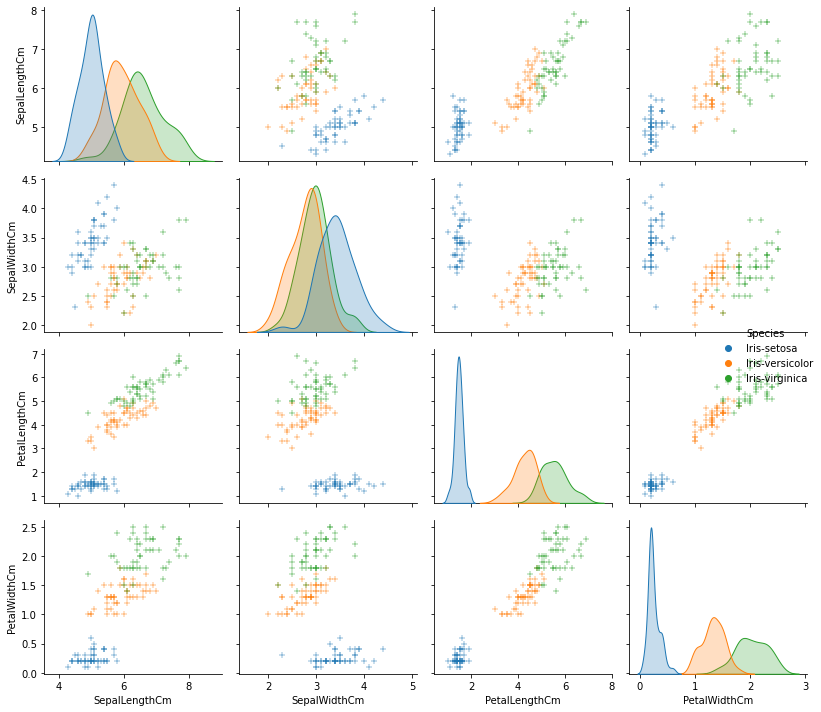

In [168]:
sns.pairplot(df, hue='Species', markers='+')
plt.tight_layout()

### Violin Plot

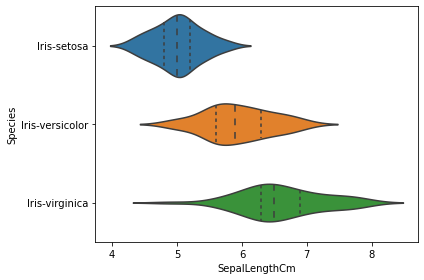

In [169]:
sns.violinplot(data=df, y='Species', x='SepalLengthCm', inner='quartile')
plt.tight_layout()

## Classification Models

### Import modules

In [170]:
from sklearn.model_selection import train_test_split # divider dataset into training set and testing set
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report # To evaluate model performance

Features & Class Label

In [171]:
X = df.drop(columns='Species') # Put the FEATURES into X variable
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [172]:
y = df['Species'] # Put the class label (target) to y variable
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

Split the dataset into training set and testing set

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=10)

print('training dataset')
print(X_train.shape)
print(y_train.shape)
print()
print('testing dataset:')
print(X_test.shape)
print(y_test.shape)

training dataset
(88, 4)
(88,)

testing dataset:
(59, 4)
(59,)


### K Nearest Neighbors

In [174]:
from sklearn.neighbors import KNeighborsClassifier

In [175]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    model_knn = KNeighborsClassifier(n_neighbors=k) # Algorithm Configuration
    model_knn.fit(X_train, y_train) # Training model
    y_pred = model_knn.predict(X_test) # Do prediction
    scores.append(accuracy_score(y_test, y_pred)) # Performance Evaluation

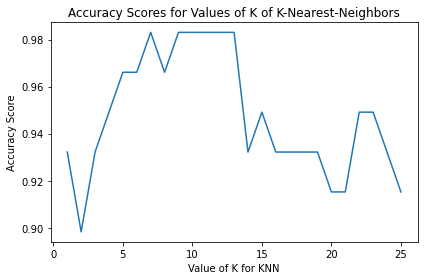

In [176]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of K of K-Nearest-Neighbors')
plt.tight_layout()
plt.show()

In [177]:
model_knn = KNeighborsClassifier(n_neighbors=3) 
model_knn.fit(X_train, y_train) 
y_pred = model_knn.predict(X_test)

In [178]:
print(accuracy_score(y_test, y_pred))

0.9322033898305084


In [179]:
print(confusion_matrix(y_test, y_pred))

[[18  0  0]
 [ 0 19  2]
 [ 0  2 18]]


In [180]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.90      0.90      0.90        21
 Iris-virginica       0.90      0.90      0.90        20

       accuracy                           0.93        59
      macro avg       0.93      0.93      0.93        59
   weighted avg       0.93      0.93      0.93        59



### Logistic Regression

In [181]:
from sklearn.linear_model import LogisticRegression

In [182]:
# model_logreg = LogisticRegression()
model_logreg = LogisticRegression(solver='lbfgs', multi_class='auto')
model_logreg.fit(X_train,y_train)
y_pred = model_logreg.predict(X_test)

In [183]:
print(accuracy_score(y_test, y_pred))

0.9322033898305084


In [184]:
print(confusion_matrix(y_test, y_pred))

[[18  0  0]
 [ 0 20  1]
 [ 0  3 17]]


In [185]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.87      0.95      0.91        21
 Iris-virginica       0.94      0.85      0.89        20

       accuracy                           0.93        59
      macro avg       0.94      0.93      0.93        59
   weighted avg       0.93      0.93      0.93        59



### Support Vector Classifier

In [186]:
from sklearn.svm import SVC

In [187]:
model_svc = SVC(gamma='scale')
model_svc.fit(X_train,y_train)
y_pred = model_svc.predict(X_test)

### Decisition Tree Classifier

In [188]:
from sklearn.tree import DecisionTreeClassifier

In [189]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
y_pred = model_dt.predict(X_test)

### Random Forest Classifier

In [190]:
from sklearn.ensemble import RandomForestClassifier

In [191]:
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train,y_train)
pred_rf = model_rf.predict(X_test)

### Accuracy Comparison for each models

In [192]:
models = [model_knn, model_logreg, model_svc, model_dt, model_rf]
accuracy_scores = []
for model in models:
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
print(accuracy_scores)

[0.9491525423728814, 0.9491525423728814, 0.9491525423728814, 0.9491525423728814, 0.9491525423728814]


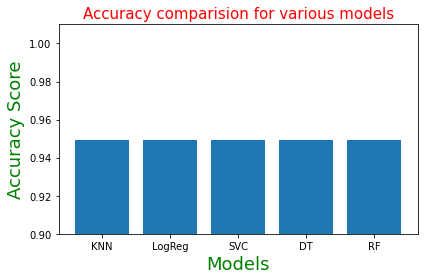

In [193]:
plt.bar(['KNN', 'LogReg', 'SVC', 'DT', 'RF'],accuracy_scores)
plt.ylim(0.90,1.01)
plt.title('Accuracy comparision for various models', fontsize=15, color='r')
plt.xlabel('Models', fontsize=18, color='g')
plt.ylabel('Accuracy Score', fontsize=18, color='g')
plt.tight_layout()
plt.show()

So, these models can be said to be a good enough model for classifying iris datasets. Accuracy of data train is 100% and accuracy of data test is 94%, with a difference in accuracy that tends to be insignificant